In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('singapore-residents data.csv')
df.head()

1.Create columns for Male and Female . Female ethnic and Male Ethnic
2.At what rate the Singaport population is increasing ?
3.Which ethnic group has the highest represenation in Singapore?(current)In 
4.In last 10 years which ethinic group has shown highest increment in population ?
5. In which years female poulation was higher than male population ?
6. what is the trend in last 10 years for male and female population?
7. What is trend of Chinese and Indian in last 10 years ?
8.What is the avearge increase in Chinese population ?
9. Is Chinese increasing at a higher rate compared to Indians?
10.What is the Singaport population in 2019/2025 ?
11.What will be population of Chinese in 2019/2125 ?
12.What will be the population of Indians in 2019/2025 ?
13.What will be the male population in 2019/2025 ?
14.What will be the female population in 2019/2025 ?
15.When will the population of Singapore reach 5 million ?

In [ ]:
df.info()

In [ ]:
#define empty columns
df['Total_Residents'] = ""
#assigning value in first column

df['Total_Residents'] =  df.loc[df['level_1']=='Total Residents','value']
df['Total_Male_Residents'] = ""
df['Total_Female_Residents'] = ""
df['Total_Malays'] = ""
df['Total_Male_Malays'] =""
df['Total_Female_Malays'] =""
df['Total_Chinese'] =""
df['Total_Male_Chinese'] =""
df['Total_Female_Chinese'] =""
df['Total_Indians'] =""
df['Total_Male_Indians'] =""
df['Total_Female_Indians'] =""
df['Other_Ethnic_Groups_(Total)'] =""
df['Other_Ethnic_Groups_(Males)'] =""
df['Other_Ethnic_Groups_(Females)'] =""


In [ ]:
#assigning values into empty columns
df['Total_Male_Residents'] =  df.loc[df['level_1']=='Total Male Residents','value']
df['Total_Female_Residents'] =  df.loc[df['level_1']=='Total Female Residents','value']
df['Total_Malays'] =  df.loc[df['level_1']=='Total Malays','value']
df['Total_Male_Malays'] =  df.loc[df['level_1']=='Total Male Malays','value']
df['Total_Female_Malays']  =  df.loc[df['level_1']=='Total Female Malays','value']
df['Total_Chinese'] =  df.loc[df['level_1']=='Total Chinese','value']
df['Total_Male_Chinese']=  df.loc[df['level_1']=='Total Male Chinese','value']
df['Total_Female_Chinese'] =  df.loc[df['level_1']=='Total Female Chinese','value']
df['Total_Indians'] =  df.loc[df['level_1']=='Total Indians','value']
df['Total_Male_Indians'] =  df.loc[df['level_1']=='Total Male Indians','value']
df['Total_Female_Indians'] =  df.loc[df['level_1']=='Total Female Indians','value']
df['Other_Ethnic_Groups_(Total)'] =  df.loc[df['level_1']=='Other Ethnic Groups (Total)','value']
df['Other_Ethnic_Groups_(Males)'] =  df.loc[df['level_1']=='Other Ethnic Groups (Males)','value']
df['Other_Ethnic_Groups_(Females)'] =  df.loc[df['level_1']=='Other Ethnic Groups (Females)','value']

In [ ]:
#drop level 1 and value columns 
df = df.drop(['level_1','value'],axis='columns')

In [ ]:
#we will shift values in clumns so as to align with first instance of year
i =2
while (True):
    p=(i-1)
    df.iloc[:,i] = df.iloc[:,i].shift(-p)
    i+=1
    if i==16:
        break
    

In [ ]:
#drop duplicate year keeping first instanance
df = df.drop_duplicates(subset='year', keep='first')
df.reset_index(drop=True, inplace=True)

In [ ]:
df.head()

In [ ]:
#convert dtypes into int for all columns
for column in df:
    df[column] = df[column].astype(int)

In [ ]:
df.info()

In [ ]:
df.head()

DATA INTEGRITY CHECKS
We need to do data integrity checks to ensure that total columns match individual splits. 

In [ ]:
#Check total Malay is some of male and female population
total_malay_wrong = df.loc[df['Total_Male_Malays']+ df['Total_Female_Malays'] != df['Total_Malays']]
total_malay_wrong

In [ ]:
# whereever the Total Malay residents is not a sum of male and female populations correct them
for values in total_malay_wrong.index.values:
    df.iloc[values:,4] = df.iloc[values:,5] + df.iloc[values:,6]

In [ ]:
total_chinese_wrong = df.loc[df['Total_Male_Chinese']+ df['Total_Female_Chinese'] != df['Total_Chinese']]
total_chinese_wrong

In [ ]:
# whereever the Total Chinese residents is not a sum of male and female populations correct them
for values in total_chinese_wrong.index.values:
    df.iloc[values:,7] = df.iloc[values:,8] + df.iloc[values:,9]

In [ ]:
total_Indians_wrong = df.loc[df['Total_Male_Indians']+ df['Total_Female_Indians'] != df['Total_Indians']]
total_Indians_wrong

In [ ]:
# whereever the Total Indians residents is not a sum of male and female populations correct them
for values in total_Indians_wrong.index.values:
    df.iloc[values:,10] = df.iloc[values:,11] + df.iloc[values:,12]

In [ ]:
total_ethnic_wrong = df.loc[df['Other_Ethnic_Groups_(Males)']+ df['Other_Ethnic_Groups_(Females)'] != df['Other_Ethnic_Groups_(Total)']]
total_ethnic_wrong

In [ ]:
# whereever the Total ehnic residents is not a sum of male and female populations correct them
for values in total_ethnic_wrong.index.values:
    df.iloc[values:,13] = df.iloc[values:,14] + df.iloc[values:,15]

In [ ]:
# Lets sum male and female columns to check integrity
male_total_wrong = df.loc[df.iloc[:,2] != df.iloc[:,5]+df.iloc[:,8]+ df.iloc[:,11]+df.iloc[:,14]]
male_total_wrong

In [ ]:
for values in male_total_wrong.index.values:
    df.iloc[values:,2] = df.iloc[values:,5]+df.iloc[values:,8]+ df.iloc[values:,11]+df.iloc[values:,14]

In [ ]:
# checking female total with sum of individual columns
female_total_wrong = df.loc[df.iloc[:,3] != df.iloc[:,6]+df.iloc[:,9]+ df.iloc[:,12]+df.iloc[:,15]]
female_total_wrong

In [ ]:
female_total_wrong.index.values

In [ ]:
for values in female_total_wrong.index.values:
    df.iloc[values,3] = df.iloc[values,6]+df.iloc[values,9]+ df.iloc[values,12]+df.iloc[values,15]

In [310]:
#check total residents is sum of male an female population
total_wrong = df.loc[df['Total_Male_Residents']+ df['Total_Female_Residents'] != df['Total_Residents']]
total_wrong

,year,Total_Residents,Total_Male_Residents,Total_Female_Residents,Total_Malays,Total_Male_Malays,Total_Female_Malays,Total_Chinese,Total_Male_Chinese,Total_Female_Chinese,Total_Indians,Total_Male_Indians,Total_Female_Indians,Other_Ethnic_Groups_(Total),Other_Ethnic_Groups_(Males),Other_Ethnic_Groups_(Females)


NOW THE DATA IS CLEAN AND READY FOR ANALYSIS

In [311]:
df.head(2)

,year,Total_Residents,Total_Male_Residents,Total_Female_Residents,Total_Malays,Total_Male_Malays,Total_Female_Malays,Total_Chinese,Total_Male_Chinese,Total_Female_Chinese,Total_Indians,Total_Male_Indians,Total_Female_Indians,Other_Ethnic_Groups_(Total),Other_Ethnic_Groups_(Males),Other_Ethnic_Groups_(Females)
0,1960,1646400,859600,786800,232200,121000,111200,1251600,636000,615600,133200,88000,45200,29400,14600,14800
1,1961,1702400,886500,815900,242500,125700,116800,1295000,657600,637400,135700,88800,46900,29200,14400,14800


# 2.At what rate the Singaport population is increasing ?

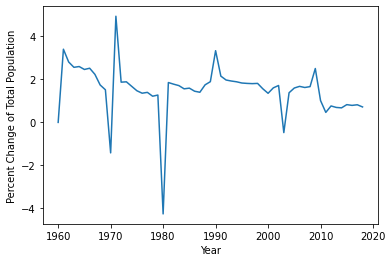

In [325]:
df['Percent_increase'] = df['Total_Residents'].pct_change()
df['Percent_increase'].fillna(0, inplace=True) 
plt.plot(df['year'],df['Percent_increase']*100)
plt.xlabel('Year')
plt.ylabel('Percent Change of Total Population')
plt.show()

In last 10 years the total population has been increasing at more or less constant at around 1%.

# Which ethnic group has the highest representation in Singapore?(current year)

In [327]:
df.tail(2)

,year,Total_Residents,Total_Male_Residents,Total_Female_Residents,Total_Malays,Total_Male_Malays,Total_Female_Malays,Total_Chinese,Total_Male_Chinese,Total_Female_Chinese,Total_Indians,Total_Male_Indians,Total_Female_Indians,Other_Ethnic_Groups_(Total),Other_Ethnic_Groups_(Males),Other_Ethnic_Groups_(Females),Percent_increase
57,2017,3965796,1943545,2022251,530710,263912,266798,2948252,1436284,1511968,358821,183818,175003,128013,59531,68482,0.008195
58,2018,3994283,1955838,2038445,535824,266486,269338,2969281,1445375,1523906,360528,184496,176032,128650,59481,69169,0.007183


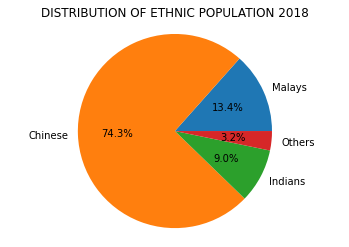

In [331]:
groups = [df.iloc[-1,4],df.iloc[-1,7],df.iloc[-1,10],df.iloc[-1,13]]
my_labels = ['Malays','Chinese','Indians','Others']
plt.pie(groups,labels=my_labels,autopct='%1.1f%%')
plt.title('DISTRIBUTION OF ETHNIC POPULATION 2018')
plt.axis('equal')
plt.show()

# In last 10 years which ethinic group has shown highest increment in population ?

In [332]:
df.columns

Index(['year', 'Total_Residents', 'Total_Male_Residents',
       'Total_Female_Residents', 'Total_Malays', 'Total_Male_Malays',
       'Total_Female_Malays', 'Total_Chinese', 'Total_Male_Chinese',
       'Total_Female_Chinese', 'Total_Indians', 'Total_Male_Indians',
       'Total_Female_Indians', 'Other_Ethnic_Groups_(Total)',
       'Other_Ethnic_Groups_(Males)', 'Other_Ethnic_Groups_(Females)',
       'Percent_increase'],
      dtype='object')

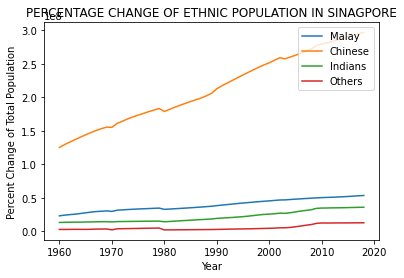

In [335]:
df['Malay_change'] = df['Total_Malays'].pct_change()
df['Chinese_change'] = df['Total_Chinese'].pct_change()
df['Indians_change'] = df['Total_Indians'].pct_change()
df['Others_change'] = df['Other_Ethnic_Groups_(Total)'].pct_change()
plt.plot(df['year'],df['Total_Malays']*100,label='Malay')
plt.plot(df['year'],df['Total_Chinese']*100,label='Chinese')
plt.plot(df['year'],df['Total_Indians']*100,label = 'Indians')
plt.plot(df['year'],df['Other_Ethnic_Groups_(Total)']*100,label='Others')
plt.title('PERCENTAGE CHANGE OF ETHNIC POPULATION IN SINAGPORE')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Percent Change of Total Population')
plt.show()

In which years female poulation was higher than male population ?

In [358]:
more_female = df.loc[df['Total_Male_Residents'] < df['Total_Female_Residents']]
print('The years in which female population was more than Male population are\n',np.array(more_female['year']),end='')
print('\nPercentage years where female population was more :',int((len(more_female)/(2018-1960))*100),'%')

The years in which female population was more than Male population are
 [1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016 2017 2018]
Percentage years where female population was more : 34 %


what is the trend in last 10 years for male and female population?

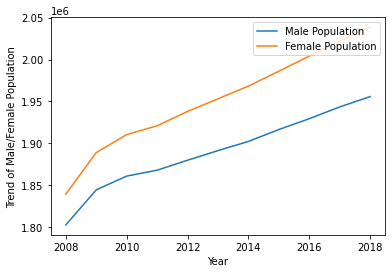

In [362]:
df_last10 = df.loc[df['year'] > 2007]
plt.plot(df_last10['year'],df_last10['Total_Male_Residents'],label='Male Population')
plt.plot(df_last10['year'],df_last10['Total_Female_Residents'],label='Female Population')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Trend of Male/Female Population')
plt.show()

What is trend of Chinese and Indian in last 10 years ?

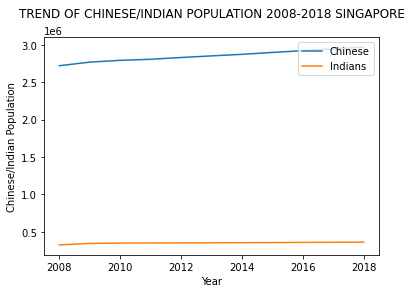

In [366]:
plt.plot(df_last10['year'],df_last10['Total_Chinese'],label='Chinese')
plt.plot(df_last10['year'],df_last10['Total_Indians'],label='Indians')
plt.legend(loc='upper right')
plt.xlabel('Year')
plt.ylabel('Chinese/Indian Population')
plt.title('TREND OF CHINESE/INDIAN POPULATION 2008-2018 SINGAPORE\n')
plt.show()


10.What is the Singaport population in 2019/2025 ?
11.What will be population of Chinese in 2019/2125 ?
12.What will be the population of Indians in 2019/2025 ?
13.What will be the male population in 2019/2025 ?
14.What will be the female population in 2019/2025 ?
15.When will the population of Singapore reach 5 million ?

What is the avearge increase in Chinese population ?

In [367]:
df.head(2)

,year,Total_Residents,Total_Male_Residents,Total_Female_Residents,Total_Malays,Total_Male_Malays,Total_Female_Malays,Total_Chinese,Total_Male_Chinese,Total_Female_Chinese,...,Total_Male_Indians,Total_Female_Indians,Other_Ethnic_Groups_(Total),Other_Ethnic_Groups_(Males),Other_Ethnic_Groups_(Females),Percent_increase,Malay_change,Chinese_change,Indians_change,Others_change
0,1960,1646400,859600,786800,232200,121000,111200,1251600,636000,615600,...,88000,45200,29400,14600,14800,0.000000,NaN,NaN,NaN,NaN
1,1961,1702400,886500,815900,242500,125700,116800,1295000,657600,637400,...,88800,46900,29200,14400,14800,0.034014,0.044358,0.034676,0.018769,-0.006803


In [373]:
mean_change_chinese = round((df['Chinese_change'].mean())*100,2)
print('Average increase of Chinese population every year from 1960-2018 is',mean_change_chinese,'%')

Average increase of Chinese population every year from 1960-2018 is 1.5 %


Is Chinese increasing at a higher rate compared to Indians?

Yes that is correct as we have seen in our previous analysis.